# Import Requirements

In [1]:
# DataFrame Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prep & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
def nl(n:int=1):
    for i in range(n):
        print()

# Load Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ammfat/datasets/main/Dataset_7%20-%20Otomotic.csv')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
print(f"'Country' uniques\t\t: {len(df['Country'].unique())}")
print(f"'Customer Name' uniques\t\t: {len(df['Customer Name'].unique())}")
print(f"'Customer e-mail' uniques\t: {len(df['Customer e-mail'].unique())}")

'Country' uniques		: 1
'Customer Name' uniques		: 498
'Customer e-mail' uniques	: 500


# Identify Missing Values

In [7]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

# Correlation

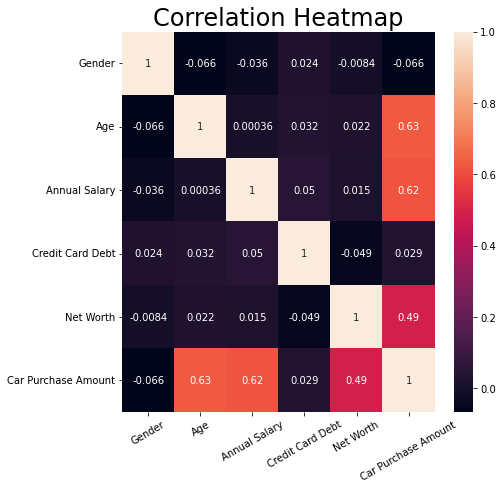

In [8]:
plt.figure(figsize=(7, 7))
plt.title("Correlation Heatmap", fontsize = 24);

sns.heatmap(df.corr(), annot=True, )

plt.xticks(rotation=30)
plt.show()

In [9]:
# sns.pairplot(df)
# plt.ioff()

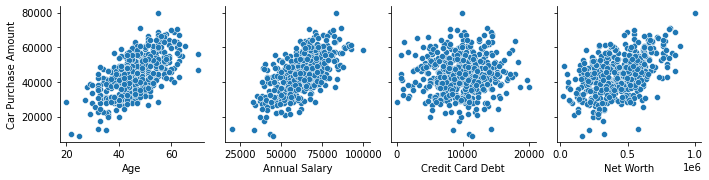

In [10]:
# plt.figure(figsize=(8, 4))

sns.pairplot(
    df,
    x_vars = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'],
    y_vars = 'Car Purchase Amount'
)

plt.show()

KORELASI ANTAR VARIABEL

Dari plot korelasi dapat dilihat bahwa Age dan Annual Salary memiliki korelasi langsung dengan Car Purchae Amount, namun Credit Card Debit dan Net Worth Tidak memiliki banyak korelasi antara car purchase amount. Sehingga, dapat disimpulkan bahwa sebenarnya banyak orang kaya tapi tidak membeli mobil mahal.

**High Possitive Correlation**

- Car Purchase Amount VS Age 
- Car Purchase Amount VS Annual Salary

**Low Possitive Correlation**
- Gender VS Credit Card Debit
- Age VS Annual Salary
- Age VS Credit Card Debit
- Age VS Net Worth
- Annual Salary VS Credit Card Debit
- Annual Salary VS Net Worth
- Credit Card Debit VS Car Purchase Amount
- Net Worth VS Car Purchase Amount

**Low Negative Correlation**
- Gender VS Age
- Gender VS Annual Salary
- Gender VS Net Worth
- Gender VS Car Purchase Amount
- Credit Card Debit VS Net Worth


# Gender VS ...

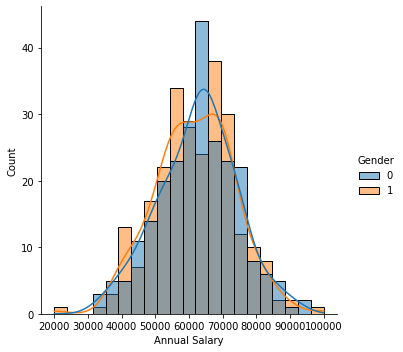

In [11]:
sns.displot(data=df, x='Annual Salary', kde=True, hue='Gender')

plt.show()

853.5400000000009


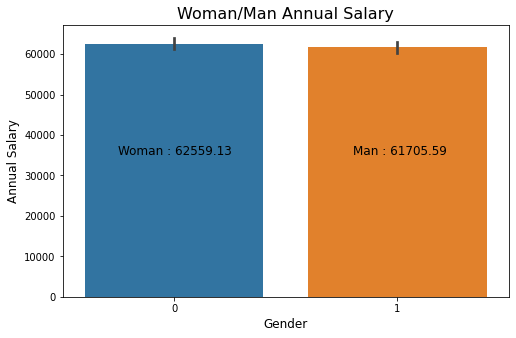

In [12]:
plt.figure(figsize=(8, 5))

woman_annual = round(
    df.loc[
       df['Gender'] == 0, 'Annual Salary'
    ].mean(), 2
)

man_annual = round(
    df.loc[
       df['Gender'] == 1, 'Annual Salary'
    ].mean(), 2
)

sns.barplot(data=df, x='Gender', y='Annual Salary')

plt.title("Woman/Man Annual Salary", fontsize=16)
plt.annotate(f"Woman : {woman_annual}", xy=(-0.25, 35_000), fontsize=12)
plt.annotate(f"Man : {man_annual}", xy=(0.8, 35_000), fontsize=12)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Salary', fontsize=12)

print(abs(man_annual - woman_annual))

plt.show()

Kelompok dengan gender Perempuan memiliki jumlah yang lebih tinggi untuk Annual Salary dibandingkan kelompok dengan gender Laki-laki.

1429.5099999999948


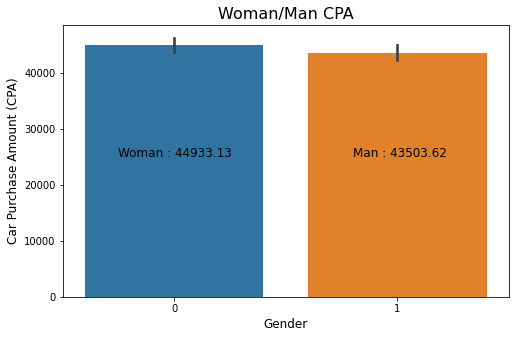

In [13]:
plt.figure(figsize=(8, 5))

woman_cpa = round(
    df.loc[
       df['Gender'] == 0, 'Car Purchase Amount'
    ].mean(), 2
)

man_cpa = round(
    df.loc[
       df['Gender'] == 1, 'Car Purchase Amount'
    ].mean(), 2
)

sns.barplot(data=df, x='Gender', y='Car Purchase Amount')

plt.title("Woman/Man CPA", fontsize=16)
plt.annotate(f"Woman : {woman_cpa}", xy=(-0.25, 25_000), fontsize=12)
plt.annotate(f"Man : {man_cpa}", xy=(0.8, 25_000), fontsize=12)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Car Purchase Amount (CPA)', fontsize=12)

print(abs(man_cpa - woman_cpa))

plt.show()

Kelompok dengan gender Perempuan memiliki jumlah yang lebih tinggi untuk Car Purchase amount (CPA) dibandingkan kelompok dengan gender Laki-laki.

# Data Distribution

## Age

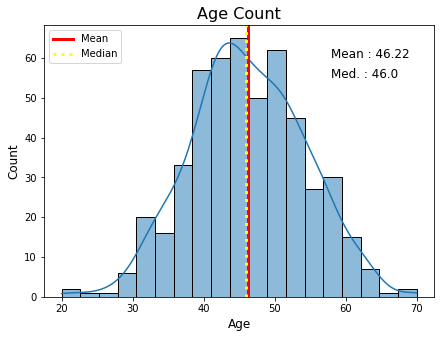

In [14]:
plt.figure(figsize=(7, 5))

mean = round(df['Age'].mean(), 2)
median = round(df['Age'].median(), 2)

sns.histplot(df, x="Age", kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Age Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(58, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(58, 55), fontsize=12)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

plt.show()

## Annual Salary

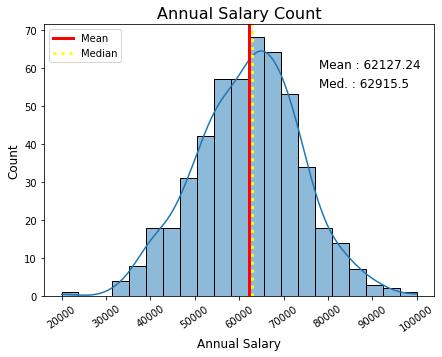

In [15]:
plt.figure(figsize=(7, 5))

mean = round(df['Annual Salary'].mean(), 2)
median = round(df['Annual Salary'].median(), 2)

sns.histplot(df,x="Annual Salary",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Annual Salary Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(78_000, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(78_000, 55), fontsize=12)

plt.xlabel('Annual Salary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=35)
plt.legend(loc='upper left')

plt.show()

## Credit Card Debt

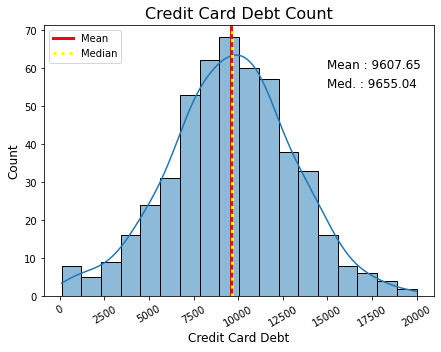

In [16]:
plt.figure(figsize=(7, 5))

mean = round(df['Credit Card Debt'].mean(), 2)
median = round(df['Credit Card Debt'].median(), 2)

sns.histplot(df,x="Credit Card Debt",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Credit Card Debt Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(15_000, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(15_000, 55), fontsize=12)

plt.xlabel('Credit Card Debt', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.legend(loc='upper left')

plt.show()

## Net Worth

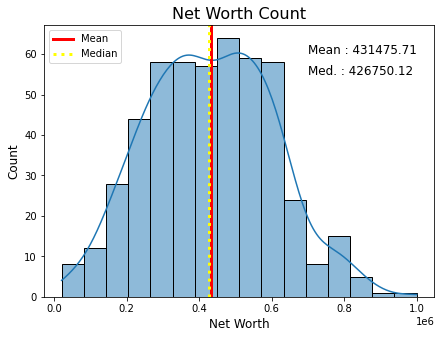

In [17]:
plt.figure(figsize=(7, 5))

mean = round(df['Net Worth'].mean(), 2)
median = round(df['Net Worth'].median(), 2)

sns.histplot(df, x="Net Worth", kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Net Worth Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(700_000, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(700_000, 55), fontsize=12)

plt.xlabel('Net Worth', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

plt.show()

## Car Purchase Amount

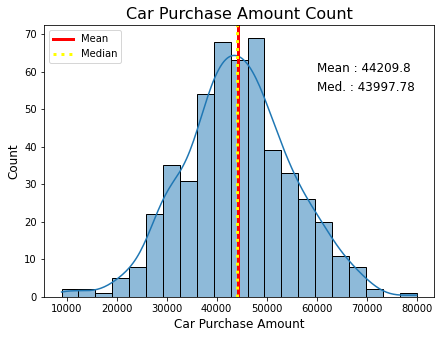

In [18]:
plt.figure(figsize=(7, 5))

mean = round(df['Car Purchase Amount'].mean(), 2)
median = round(df['Car Purchase Amount'].median(), 2)

sns.histplot(df,x="Car Purchase Amount",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Car Purchase Amount Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(60_000, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(60_000, 55), fontsize=12)

plt.xlabel('Car Purchase Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

plt.show()

# Car Purchase Amount (Above & Below AVG)

In [19]:
cpa_mean = df['Car Purchase Amount'].mean()
cpa_mean

44209.79921842002

In [20]:
df_cpa_above = df.loc[df['Car Purchase Amount'] > cpa_mean]
df_cpa_below = df.loc[df['Car Purchase Amount'] <= cpa_mean]

In [21]:
df_cpa_above.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,USA,1,57,68499.85162,14179.472440,428485.3604,56611.99784
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,USA,1,50,51752.23445,10985.696560,629312.4041,47434.98265


In [22]:
df_cpa_below.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
6,Griffin Rivera,vehicula@at.co.uk,USA,1,47,39814.52200,5958.460188,326373.1812,28925.70549
9,Rhonda Chavez,nec@nuncest.com,USA,1,43,53457.10132,12884.078680,476643.3544,38189.50601
11,Akeem Gibson,turpis.egestas.Fusce@purus.edu,USA,1,53,55421.65733,10014.969290,293862.5123,42288.81046


In [23]:
df_cpa_above_count = df_cpa_above['Gender'].value_counts()
df_cpa_below_count = df_cpa_below['Gender'].value_counts()

df_cpa_gender = pd.concat((df_cpa_above_count, df_cpa_below_count),
                          keys=('Above CPA Mean', 'Below CPA Mean'), axis=1)

In [24]:
df_cpa_gender

,Above CPA Mean,Below CPA Mean
0,130,117
1,119,134


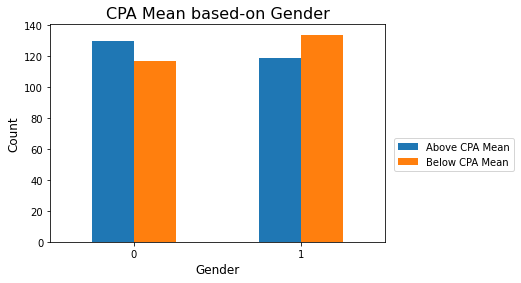

In [25]:
df_cpa_gender.plot(kind='bar')

plt.title('CPA Mean based-on Gender', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.5))

plt.show()

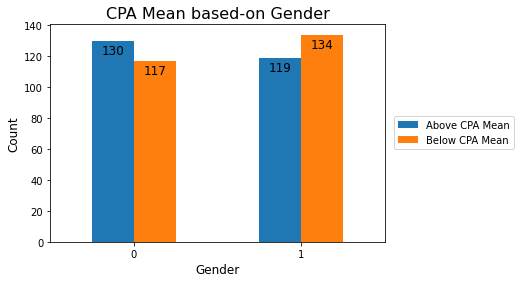

In [26]:
cpa_bar = df_cpa_gender.plot(kind='bar')

for bar in cpa_bar.patches:
    cpa_bar.annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), 
                     ha='center', va='center',
                     size=15, xytext=(0, -10),
                     fontsize=12,
                     textcoords='offset points')

plt.title('CPA Mean based-on Gender', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.6))

plt.show()

Di sini kita mendapatkan atribut rata-rata dari kelompok above CPA Mean vs Below CPA Mean. Barplot mewakili Mean.

Bar plot analysis :
1. Break out group by above CPA Mean vs below CPA Mean.
2. Break out group by male vs female
3. Break out group by CPA

# Outlier: Identifying

## Age

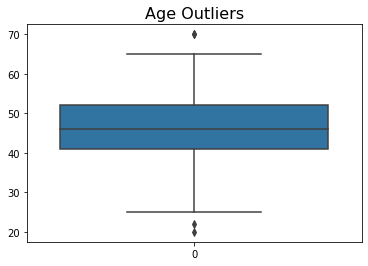

In [27]:
sns.boxplot(data=df['Age'])

plt.title("Age Outliers", fontsize=16)

plt.show()

In [28]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 24.5
Upper Limit	: 68.5


In [29]:
df.loc[df['Age'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,USA,1,22,43131.78411,10917.14094,326742.7352,10092.22509
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,USA,1,20,70467.29492,100.00000,494606.6334,28645.39425


In [30]:
df.loc[df['Age'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
194,Gil Sanders,eu.ultrices@cursuset.net,USA,0,70,52323.24480,12438.856480,346555.1716,56229.41270
236,Tate C. Foster,dignissim.magna@Maurisvel.edu,USA,1,70,41434.51258,6810.555606,252220.2937,47009.57741


## Annual Salary

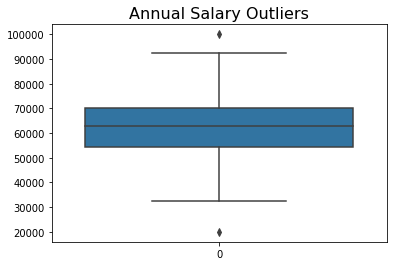

In [31]:
sns.boxplot(data=df['Annual Salary'])

plt.title("Annual Salary Outliers", fontsize=16)

plt.show()

In [32]:
q1 = df['Annual Salary'].quantile(0.25)
q3 = df['Annual Salary'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 30803.149979999995
Upper Limit	: 93706.68922


In [33]:
df.loc[df['Annual Salary'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,USA,1,32,20000.0,14261.80773,579181.6552,12895.71468


In [34]:
df.loc[df['Annual Salary'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,USA,1,46,100000.0,17452.92179,188032.0778,58350.31809


## Credit Card Debt

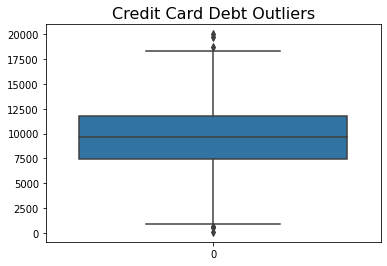

In [35]:
sns.boxplot(data=df['Credit Card Debt'])

plt.title("Credit Card Debt Outliers", fontsize=16)

plt.show()

In [36]:
q1 = df['Credit Card Debt'].quantile(0.25)
q3 = df['Credit Card Debt'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 795.4882481250006
Upper Limit	: 18400.895031125


In [37]:
df.loc[df['Credit Card Debt'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
239,Zane I. Boone,blandit@Cum.edu,USA,1,45,62939.12851,632.052852,455589.7973,44434.98419
290,Abigail X. Lindsey,dui@nondui.ca,USA,0,63,46549.16329,640.045378,626163.8320,55543.38497
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,USA,1,20,70467.29492,100.000000,494606.6334,28645.39425
488,Neville,felis.Nulla@mi.ca,USA,0,42,61575.95020,594.804949,497197.2640,41984.62412


In [38]:
df.loc[df['Credit Card Debt'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
221,Laurel H. Snow,dui.Suspendisse.ac@tacitisociosqu.org,USA,1,36,69494.69783,20000.00000,335809.6171,37303.56701
253,Shaeleigh M. Mckenzie,diam.lorem.auctor@estmollisnon.net,USA,1,46,55434.04046,18693.14652,316906.6441,37093.92033
440,Ora,bibendum.Donec.felis@liberoestcongue.org,USA,1,40,57777.15558,19692.91262,601210.2803,41147.46679


## Net Worth

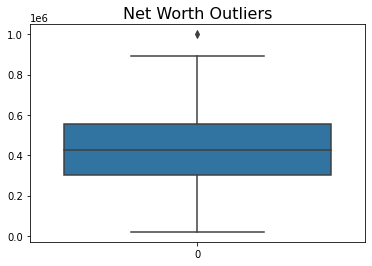

In [39]:
sns.boxplot(data=df['Net Worth'])

plt.title("Net Worth Outliers", fontsize=16)

plt.show()

In [40]:
q1 = df['Net Worth'].quantile(0.25)
q3 = df['Net Worth'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: -86426.22833749995
Upper Limit	: 943574.9029625


In [41]:
df.loc[df['Net Worth'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,USA,1,55,83333.81054,9874.075327,1000000.0,80000.0


## Car Purchase Amount

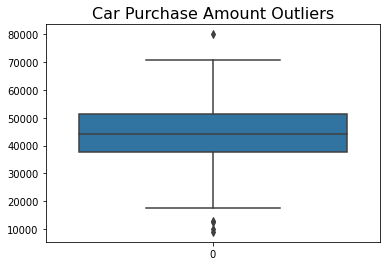

In [42]:
sns.boxplot(data=df['Car Purchase Amount'])

plt.title("Car Purchase Amount Outliers", fontsize=16)

plt.show()

In [43]:
q1 = df['Car Purchase Amount'].quantile(0.25)
q3 = df['Car Purchase Amount'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 17192.67582374998
Upper Limit	: 71691.92973375


In [44]:
df.loc[df['Car Purchase Amount'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,USA,1,22,43131.78411,10917.140940,326742.7352,10092.22509
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,USA,1,32,20000.00000,14261.807730,579181.6552,12895.71468
270,Urielle M. Contreras,elit.Aliquam.auctor@dolor.org,USA,0,35,33422.99683,8570.611562,211168.6293,12536.93842
453,Tatyana,sem@parturientmontesnascetur.net,USA,0,25,45092.74073,11380.092880,158758.3577,9000.00000


In [45]:
df.loc[df['Car Purchase Amount'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,USA,1,55,83333.81054,9874.075327,1000000.0,80000.0


# Advanced Label Encoding: `Gender`

In [46]:
df['Gender'].value_counts()

1    253
0    247
Name: Gender, dtype: int64

In [47]:
gender_data = df.pivot_table(
    index='Gender',
    values=['Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount'],
    aggfunc=[np.mean, np.median, np.min, np.max, np.std]
)

In [48]:
gender_data

mean                      ...              std               
       Annual Salary Car Purchase Amount  ... Credit Card Debt      Net Worth
Gender                                    ...                                
0       62559.128313        44933.131928  ...      3526.913927  181655.275472
1       61705.593322        43503.620644  ...      3456.912974  165575.757455

[2 rows x 20 columns]

In [49]:
gender_data.describe()

mean                      ...              std               
      Annual Salary Car Purchase Amount  ... Credit Card Debt      Net Worth
count      2.000000            2.000000  ...         2.000000       2.000000
mean   62132.360818        44218.376286  ...      3491.913450  173615.516464
std      603.540380         1010.817122  ...        49.498148   11369.936228
min    61705.593322        43503.620644  ...      3456.912974  165575.757455
25%    61918.977070        43860.998465  ...      3474.413212  169595.636960
50%    62132.360818        44218.376286  ...      3491.913450  173615.516464
75%    62345.744565        44575.754107  ...      3509.413688  177635.395968
max    62559.128313        44933.131928  ...      3526.913927  181655.275472

[8 rows x 20 columns]

In [50]:
# Split the pivot table

mean_gender     = gender_data['mean'].reset_index()
median_gender   = gender_data['median'].reset_index()
min_gender      = gender_data['amin'].reset_index()
max_gender      = gender_data['amax'].reset_index()
std_gender      = gender_data['std'].reset_index()

In [51]:
mean_gender.columns = ['Gender', 'mean_Annual Salary', 'mean_Car Purchase Amount', 'mean_Credit Card Debt', 'mean_Net Worth']
median_gender.columns = ['Gender', 'median_Annual Salary', 'median_Car Purchase Amount', 'median_Credit Card Debt', 'median_Net Worth']
min_gender.columns = ['Gender', 'min_Annual Salary', 'min_Car Purchase Amount', 'min_Credit Card Debt', 'min_Net Worth']
max_gender.columns = ['Gender', 'max_Annual Salary', 'max_Car Purchase Amount', 'max_Credit Card Debt', 'max_Net Worth']
std_gender.columns = ['Gender', 'std_Annual Salary', 'std_Car Purchase Amount', 'std_Credit Card Debt', 'std_Net Worth']

In [52]:
# Merger

def merger(columns:list):
    n = len(columns)
    res = None

    for i in range(1, n):
        if i == 1:
            res = pd.merge(columns[i-1], columns[i], how='inner', on='Gender')
            continue
        
        res = pd.merge(res, columns[i], how='inner', on='Gender')

    return res

In [53]:
gender_data = merger([
                      mean_gender,
                      median_gender,
                      min_gender,
                      max_gender,
                      std_gender
])

In [54]:
del mean_gender, median_gender, min_gender, max_gender, std_gender

In [55]:
# Join to main table

df = pd.merge(df, gender_data, how='left', on='Gender')

In [56]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,mean_Annual Salary,mean_Car Purchase Amount,mean_Credit Card Debt,mean_Net Worth,median_Annual Salary,median_Car Purchase Amount,median_Credit Card Debt,median_Net Worth,min_Annual Salary,min_Car Purchase Amount,min_Credit Card Debt,min_Net Worth,max_Annual Salary,max_Car Purchase Amount,max_Credit Card Debt,max_Net Worth,std_Annual Salary,std_Car Purchase Amount,std_Credit Card Debt,std_Net Worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,62559.128313,44933.131928,9522.298721,432948.721130,63561.04525,44463.30502,9725.549901,454791.7251,32697.98161,9000.00000,594.804949,20000.0000,92471.17612,70878.29664,17870.63765,891439.8761,11619.855534,10325.991917,3526.913927,181655.275472
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,62559.128313,44933.131928,9522.298721,432948.721130,63561.04525,44463.30502,9725.549901,454791.7251,32697.98161,9000.00000,594.804949,20000.0000,92471.17612,70878.29664,17870.63765,891439.8761,11619.855534,10325.991917,3526.913927,181655.275472
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455


# Drop Non-predictable Features

In [57]:
df = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Gender'], axis=1)

In [58]:
df.tail()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,mean_Annual Salary,mean_Car Purchase Amount,mean_Credit Card Debt,mean_Net Worth,median_Annual Salary,median_Car Purchase Amount,median_Credit Card Debt,median_Net Worth,min_Annual Salary,min_Car Purchase Amount,min_Credit Card Debt,min_Net Worth,max_Annual Salary,max_Car Purchase Amount,max_Credit Card Debt,max_Net Worth,std_Annual Salary,std_Car Purchase Amount,std_Credit Card Debt,std_Net Worth
495,41,71942.40291,6995.902524,541670.1016,48901.44342,62559.128313,44933.131928,9522.298721,432948.721130,63561.04525,44463.30502,9725.549901,454791.7251,32697.98161,9000.00000,594.804949,20000.0000,92471.17612,70878.29664,17870.63765,891439.8761,11619.855534,10325.991917,3526.913927,181655.275472
496,38,56039.49793,12301.456790,360419.0988,31491.41457,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
497,54,68888.77805,10611.606860,764531.3203,64147.28888,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
498,59,49811.99062,14013.034510,337826.6382,45442.15353,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
499,47,61370.67766,9391.341628,462946.4924,45107.22566,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455


In [59]:
df.columns

Index(['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount', 'mean_Annual Salary', 'mean_Car Purchase Amount',
       'mean_Credit Card Debt', 'mean_Net Worth', 'median_Annual Salary',
       'median_Car Purchase Amount', 'median_Credit Card Debt',
       'median_Net Worth', 'min_Annual Salary', 'min_Car Purchase Amount',
       'min_Credit Card Debt', 'min_Net Worth', 'max_Annual Salary',
       'max_Car Purchase Amount', 'max_Credit Card Debt', 'max_Net Worth',
       'std_Annual Salary', 'std_Car Purchase Amount', 'std_Credit Card Debt',
       'std_Net Worth'],
      dtype='object')

# Train-Test Split

In [60]:
X = df.drop(['Car Purchase Amount'], axis=1)
y = df['Car Purchase Amount']

In [61]:
X.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,mean_Annual Salary,mean_Car Purchase Amount,mean_Credit Card Debt,mean_Net Worth,median_Annual Salary,median_Car Purchase Amount,median_Credit Card Debt,median_Net Worth,min_Annual Salary,min_Car Purchase Amount,min_Credit Card Debt,min_Net Worth,max_Annual Salary,max_Car Purchase Amount,max_Credit Card Debt,max_Net Worth,std_Annual Salary,std_Car Purchase Amount,std_Credit Card Debt,std_Net Worth
0,42,62812.09301,11609.380910,238961.2505,62559.128313,44933.131928,9522.298721,432948.721130,63561.04525,44463.30502,9725.549901,454791.7251,32697.98161,9000.00000,594.804949,20000.0000,92471.17612,70878.29664,17870.63765,891439.8761,11619.855534,10325.991917,3526.913927,181655.275472
1,41,66646.89292,9572.957136,530973.9078,62559.128313,44933.131928,9522.298721,432948.721130,63561.04525,44463.30502,9725.549901,454791.7251,32697.98161,9000.00000,594.804949,20000.0000,92471.17612,70878.29664,17870.63765,891439.8761,11619.855534,10325.991917,3526.913927,181655.275472
2,43,53798.55112,11160.355060,638467.1773,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
3,58,79370.03798,14426.164850,548599.0524,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455
4,57,59729.15130,5358.712177,560304.0671,61705.593322,43503.620644,9690.967353,430037.639104,61922.89710,42909.27129,9611.317626,410655.9947,20000.00000,10092.22509,100.000000,69821.6376,100000.00000,80000.00000,20000.00000,1000000.0000,11792.069787,11167.769115,3456.912974,165575.757455


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression

## Modeling

In [63]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [64]:
# EVALUATION Method

def eval_reg(y:pd.DataFrame, y_pred:pd.DataFrame):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return {'MAE': mae, 'MSE': mse}

## Prediction

In [65]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

print(linear_reg.coef_)
print(linear_reg.intercept_)

[ 8.40286506e+02  5.62069396e-01  5.07900810e-03  2.89249287e-02
  1.03518098e+09 -6.18411315e+08  6.66163203e+07  9.35929179e+08
  9.75696588e+08 -5.03726118e+08 -2.05267316e+08 -4.32878381e+09
 -3.62339156e+08  1.09733954e+08 -1.66456893e+07  1.89685040e+09
  1.42457697e+09  1.28447579e+09  2.83435148e+08 -2.99950351e+09
  2.28371995e+08 -2.08733551e+07  8.26309726e+05 -9.81179472e+08]
4083022433422731.0


In [66]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

## Evaluation (MAE)

In [68]:
# Evaluation

print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 209.76270485000012
Test	: 195.5206304999999


In [69]:
df.loc[119]

Age                               35.000000
Annual Salary                  54355.759500
Credit Card Debt               10008.767970
Net Worth                     573052.011900
Car Purchase Amount            34521.176180
mean_Annual Salary             62559.128313
mean_Car Purchase Amount       44933.131928
mean_Credit Card Debt           9522.298721
mean_Net Worth                432948.721130
median_Annual Salary           63561.045250
median_Car Purchase Amount     44463.305020
median_Credit Card Debt         9725.549901
median_Net Worth              454791.725100
min_Annual Salary              32697.981610
min_Car Purchase Amount         9000.000000
min_Credit Card Debt             594.804949
min_Net Worth                  20000.000000
max_Annual Salary              92471.176120
max_Car Purchase Amount        70878.296640
max_Credit Card Debt           17870.637650
max_Net Worth                 891439.876100
std_Annual Salary              11619.855534
std_Car Purchase Amount        1

In [70]:
res = linear_reg.predict([X.iloc[495].values])
evaluation = eval_reg(y_test, y_test_pred)['MAE']

print(f"Expected\t: {y.iloc[495]}")
print(f"Res\t\t: {res[0]}")
print(f"Res - Eval\t: {(res - evaluation)[0]}")
print(f"Res + Eval\t: {(res + evaluation)[0]}")

Expected	: 48901.443419999996
Res		: 48501.0
Res - Eval	: 48305.4793695
Res + Eval	: 48696.5206305


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## R2 & MAE Score

In [71]:
linr_r2_train = linear_reg.score(X_train, y_train) 
linr_r2_test = linear_reg.score(X_test, y_test)
print(linr_r2_test)

0.999579995810479


In [72]:
linr_mae_train = mean_absolute_error(y_train, y_train_pred)
linr_mae_test = mean_absolute_error(y_test, y_test_pred)

print(linr_mae_train, linr_mae_test)

209.76270485000012 195.5206304999999


## Conclusion

Seems good!

# Elastic-net

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
elastic_net = ElasticNet().fit(X_train, y_train)

In [75]:
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

In [76]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 213.41444829464137
Test	: 199.4939622941421


In [77]:
enet_r2_train = elastic_net.score(X_train, y_train)
enet_r2_test = elastic_net.score(X_test, y_test)

enet_r2_test

0.9995725096735453

In [78]:
enet_mae_train = mean_absolute_error(y_train, y_train_pred)
enet_mae_test = mean_absolute_error(y_test, y_test_pred)

print(enet_mae_train, enet_mae_test)

213.41444829464137 199.4939622941421


# Lasso

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [81]:
print(lasso.coef_)
print(lasso.intercept_)
print(lasso.alpha)

[ 8.40271562e+02  5.62066214e-01  5.07820945e-03  2.89249238e-02
 -2.39634518e-02 -6.60463705e-06  0.00000000e+00 -2.44605813e-06
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.45399440e-07
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.03804052e-09
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.00080583e-09
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
-40589.927850966495
1.0


In [82]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [83]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 209.776411664053
Test	: 195.6255603402393


In [84]:
lr_r2_train = lasso.score(X_train, y_train)
lr_r2_test = lasso.score(X_test, y_test)

lr_r2_test

0.9995801627651708

In [85]:
lr_mae_train = mean_absolute_error(y_train, y_train_pred)
lr_mae_test = mean_absolute_error(y_test, y_test_pred)

print(lr_mae_train, lr_mae_test)

209.776411664053 195.6255603402393


# Ridge

In [86]:
from sklearn.linear_model import Ridge

In [87]:
ridge = Ridge().fit(X_train, y_train)

In [88]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [89]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 209.77823246645303
Test	: 195.62941633526833


In [90]:
rr_r2_train = ridge.score(X_train, y_train)
rr_r2_test = ridge.score(X_test, y_test)

rr_r2_test

0.9995802006105122

In [91]:
rr_mae_train = mean_absolute_error(y_train, y_train_pred)
rr_mae_test = mean_absolute_error(y_test, y_test_pred)

print(rr_mae_train, rr_mae_test)

209.77823246645303 195.62941633526833


# Model Comparison

In [92]:
compare_r2 = {
    'Linear Reg.'       : (linr_r2_train,   linr_r2_test),
    'Lasso'             : (lr_r2_train,     lr_r2_test),
    'Ridge'             : (rr_r2_train,     rr_r2_test),
    'Elastic Net'       : (enet_r2_train,   enet_r2_test)
}

compare_r2 = {k: v for k, v in sorted(compare_r2.items(), key=lambda item: item[1][1], reverse=False)}

In [93]:
compare_r2 = pd.DataFrame(compare_r2).transpose() #.reset_index()
compare_r2.columns = ['R2 Train', 'R2 Test']

In [94]:
compare_r2

,R2 Train,R2 Test
Elastic Net,0.999456,0.999573
Linear Reg.,0.999480,0.999580
Lasso,0.999480,0.999580
Ridge,0.999480,0.999580


In [95]:
compare_r2.to_dict('index')

{'Elastic Net': {'R2 Test': 0.9995725096735453,
  'R2 Train': 0.9994558783199484},
 'Lasso': {'R2 Test': 0.9995801627651708, 'R2 Train': 0.9994800004729341},
 'Linear Reg.': {'R2 Test': 0.999579995810479, 'R2 Train': 0.9994799906504338},
 'Ridge': {'R2 Test': 0.9995802006105122, 'R2 Train': 0.9994800000003805}}

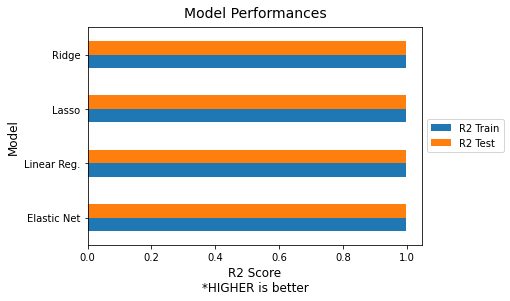

In [96]:
compare_r2.plot(kind='barh')

plt.title("Model Performances", fontsize=14, pad=10)
plt.xticks()
plt.xlabel('R2 Score\n*HIGHER is better', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.legend(loc='best', bbox_to_anchor=(1, 0.6))

plt.show()

In [97]:
compare_mae = {
    'Linear Reg.'       : (linr_mae_train,   linr_mae_test),
    'Lasso'             : (lr_mae_train,     lr_mae_test),
    'Ridge'             : (rr_mae_train,     rr_mae_test),
    'Elastic Net'       : (enet_mae_train,   enet_mae_test)
}

compare_mae = {k: v for k, v in sorted(compare_mae.items(), key=lambda item: item[1][1], reverse=False)}

In [98]:
compare_mae = pd.DataFrame(compare_mae).transpose() #.reset_index()
compare_mae.columns = ['MAE Train', 'MAE Test']

In [99]:
compare_mae

,MAE Train,MAE Test
Linear Reg.,209.762705,195.520630
Lasso,209.776412,195.625560
Ridge,209.778232,195.629416
Elastic Net,213.414448,199.493962


In [100]:
compare_mae.to_dict('index')

{'Elastic Net': {'MAE Test': 199.4939622941421,
  'MAE Train': 213.41444829464137},
 'Lasso': {'MAE Test': 195.6255603402393, 'MAE Train': 209.776411664053},
 'Linear Reg.': {'MAE Test': 195.5206304999999,
  'MAE Train': 209.76270485000012},
 'Ridge': {'MAE Test': 195.62941633526833, 'MAE Train': 209.77823246645303}}

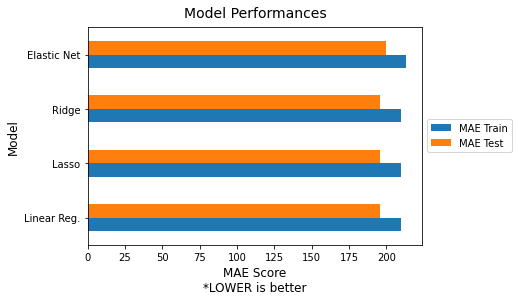

In [101]:
compare_mae.plot(kind='barh')

plt.title("Model Performances", fontsize=14, pad=10)
plt.xticks()
plt.xlabel('MAE Score\n*LOWER is better', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.legend(loc='best', bbox_to_anchor=(1, 0.6))

plt.show()